# Importing the Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Loading the Data

In [2]:
dataFrame= pd.read_excel("merc.xlsx")

In [3]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
...,...,...,...,...,...,...,...
13114,2020,35999,Automatic,500,145,55.4,2.0
13115,2020,24699,Automatic,2500,145,55.4,2.0
13116,2019,30999,Automatic,11612,145,41.5,2.1
13117,2019,37990,Automatic,2426,145,45.6,2.0


# Exploratory Data Analysis

In [4]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
dataFrame.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

In [6]:
dataFrame.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [7]:
dataFrame=dataFrame.sort_values("price",ascending=False).iloc[131:]

In [8]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [9]:
dataFrame=dataFrame[dataFrame.year !=1970]

In [10]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [11]:
dataFrame.head()

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [12]:
dataFrame=dataFrame.drop("transmission",axis=1)

In [13]:
dataFrame

,year,price,mileage,tax,mpg,engineSize
6177,2019,65990,5076,150,30.4,3.0
5779,2020,65990,999,145,28.0,4.0
3191,2020,65980,3999,145,28.0,4.0
4727,2019,65000,3398,145,27.2,4.0
8814,2019,64999,119,145,40.9,3.0
...,...,...,...,...,...,...
11549,2002,1495,13800,305,39.8,2.7
12594,2004,1495,119000,300,34.5,1.8
11765,2000,1490,87000,265,27.2,3.2
12008,2010,1350,116126,145,54.3,2.0


# X-y Split

In [14]:
y=dataFrame["price"].values
x=dataFrame.drop("price",axis=1).values

# Train-Test Split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

# Data Preprocessing

In [16]:
scaler=MinMaxScaler()

In [17]:
x_train=scaler.fit_transform(x_train)

In [18]:
x_test=scaler.transform(x_test)

# Model Building

In [19]:
model=Sequential()

model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="Adam",loss="mse")

In [20]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=256,epochs=200)

Epoch 1/200
36/36 [==============================] - 2s 14ms/step - loss: 672109376.0000 - val_loss: 687963904.0000
Epoch 2/200
36/36 [==============================] - 0s 5ms/step - loss: 671315584.0000 - val_loss: 685505088.0000
Epoch 3/200
36/36 [==============================] - 0s 5ms/step - loss: 662559872.0000 - val_loss: 663783936.0000
Epoch 4/200
36/36 [==============================] - 0s 6ms/step - loss: 609789888.0000 - val_loss: 559458368.0000
Epoch 5/200
36/36 [==============================] - 0s 5ms/step - loss: 432072672.0000 - val_loss: 293158144.0000
Epoch 6/200
36/36 [==============================] - 0s 11ms/step - loss: 164455312.0000 - val_loss: 93401296.0000
Epoch 7/200
36/36 [==============================] - 0s 5ms/step - loss: 88824784.0000 - val_loss: 88731472.0000
Epoch 8/200
36/36 [==============================] - 0s 5ms/step - loss: 86349728.0000 - val_loss: 87107536.0000
Epoch 9/200
36/36 [==============================] - 0s 5ms/step - loss: 84657368.0

Epoch 73/200
36/36 [==============================] - 0s 4ms/step - loss: 20672064.0000 - val_loss: 22023424.0000
Epoch 74/200
36/36 [==============================] - 0s 4ms/step - loss: 20556266.0000 - val_loss: 21931316.0000
Epoch 75/200
36/36 [==============================] - 0s 4ms/step - loss: 20451200.0000 - val_loss: 21928956.0000
Epoch 76/200
36/36 [==============================] - 0s 5ms/step - loss: 20416104.0000 - val_loss: 22036508.0000
Epoch 77/200
36/36 [==============================] - 0s 4ms/step - loss: 20398944.0000 - val_loss: 21865852.0000
Epoch 78/200
36/36 [==============================] - 0s 5ms/step - loss: 20300412.0000 - val_loss: 21696798.0000
Epoch 79/200
36/36 [==============================] - 0s 4ms/step - loss: 20236956.0000 - val_loss: 21650760.0000
Epoch 80/200
36/36 [==============================] - 0s 5ms/step - loss: 20209176.0000 - val_loss: 21669598.0000
Epoch 81/200
36/36 [==============================] - 0s 5ms/step - loss: 20143930.0000 

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
_________________________________________________________________


# Plotting the Performance

In [22]:
kayipVeri=pd.DataFrame(model.history.history)

In [23]:
kayipVeri.head()

,loss,val_loss
0,672109376.0,687963904.0
1,671315584.0,685505088.0
2,662559872.0,663783936.0
3,609789888.0,559458368.0
4,432072672.0,293158144.0


<AxesSubplot:>

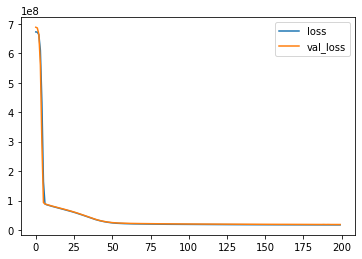

In [24]:
kayipVeri.plot()

In [25]:
tahminDizisi=model.predict(x_test)

122/122 [==============================] - 0s 2ms/step


In [26]:
tahminDizisi

array([[22005.26 ],
       [22785.215],
       [25781.217],
       ...,
       [26612.252],
       [15844.271],
       [25070.799]], dtype=float32)

# Model Evaluation

In [27]:
mean_absolute_error(y_test,tahminDizisi)

3130.549429694047

In [28]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


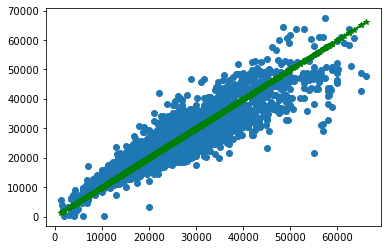

In [29]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

# Manual Testing

In [30]:
yeniArabam=dataFrame.drop("price",axis=1).iloc[5]

In [31]:
yeniArabam=scaler.transform(yeniArabam.values.reshape(-1,5))

In [32]:
model.predict(yeniArabam)

1/1 [==============================] - 0s 21ms/step


array([[60332.18]], dtype=float32)

In [33]:
dataFrame.iloc[5]

year           2018.0
price         64999.0
mileage       41102.0
tax             145.0
mpg              23.0
engineSize        5.5
Name: 8083, dtype: float64